In [37]:
import numpy as np
import seaborn as sns
import random
from tqdm import tqdm_notebook

In [38]:
post_a = None
post_b = None
bandit = None
total_reward = 0
c = 3


def agent(observation, configuration):
    global reward_sums, total_reward, bandit, post_a, post_b, likelihood_arms, c
    n_bandits = configuration.banditCount

    if observation.step == 0:
        post_a = np.ones(n_bandits)
        post_b = np.ones(n_bandits)
        likelihood_arms = np.ones(n_bandits)
    else:
        r = observation.reward - total_reward
        total_reward = observation.reward
        likelihood_arms = update_likelihood(likelihood_arms, observa.lastActions)

        # Update Gaussian posterior
        post_a[bandit] += r
        post_b[bandit] += (1 - r)
    samples = np.random.beta(post_a, post_b)
    final_pred = samples * likelihood_arms
    #print(likelihood_arms)
    bandit = int(np.argmax(final_pred))
    return bandit, post_a, post_b

def update_likelihood(actions):
    for arm in actions:
        likelihood_arms[arm] *= configura.decayRate

In [78]:
def update_likelihood(likelihood_arms, actions):
    for arm in actions:
        likelihood_arms[arm] *= configura.decayRate
    return likelihood_arms

In [79]:
n_bandits = 100

### Observation
```json
"observation": {
        "remainingOverageTime": 60,
        "step": 4,
        "agentIndex": 0,
        "reward": 3,
        "lastActions": [94,3]
    }
```

In [80]:
class bandit_observation(object):
    def __init__(self):
        self.step = 0
        self.agentIndex = 0
        self.reward = 0
        self.lastActions = []

### Configuration

```json
"configuration": {
        "episodeSteps": 2000,
        "actTimeout": 0.25,
        "runTimeout": 1200,
        "banditCount": 100,
        "decayRate": 0.97,
        "sampleResolution": 100
    }

```

In [81]:
class bandit_configuration(object):
    def __init__(self):
        self.episodeSteps= 2000
        self.banditCount = 100
        self.decayRate = 0.97
        self.sampleResolution = 100

In [82]:
def plot_arm_dist(arm, post_a, post_b):
    from scipy.stats import beta
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 1)
    a = post_a[arm]
    b = post_b[arm]
    mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), 'r-', lw=3, alpha=0.6, label=f"Distribution for arm {arm}")
    r = beta.rvs(a, b, size=1000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()
    return None

## Simulation Scenario

In [83]:
def give_rewards():
    #return random.randint(0,1)
    return np.random.choice([0,1], size=None, replace=True, p=[1-reward_odds, reward_odds])

In [84]:
def random_oponent_selection():
    values = np.arange(0,100,1)
    return np.random.choice(values)

In [85]:
other_selection = random_oponent_selection()
other_selection

61

In [86]:
reward_odds =0.9

In [87]:
observa = bandit_observation()
configura = bandit_configuration()
configura.decayRate

0.97

In [88]:
configura.episodeSteps = 2000

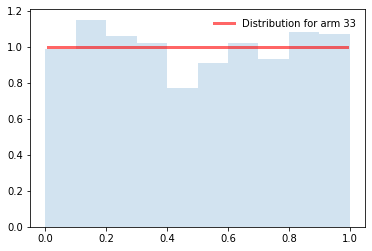

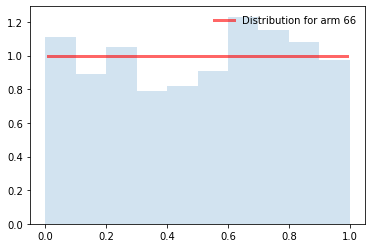

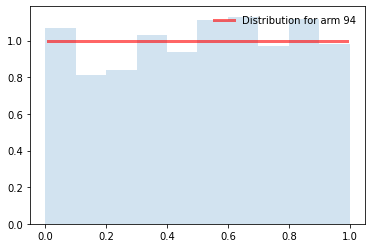

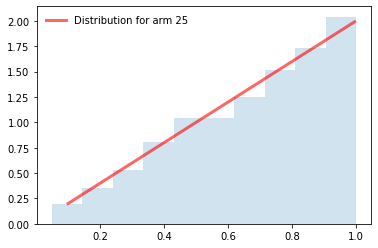

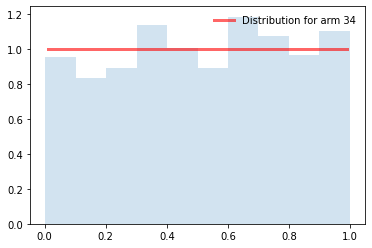

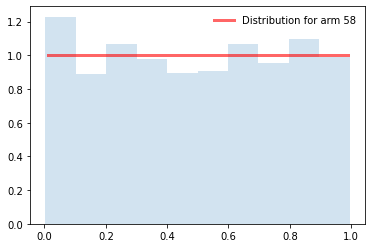

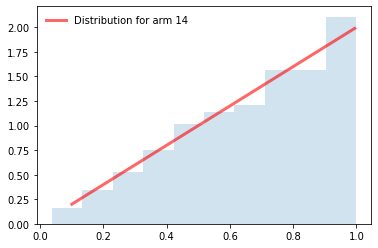

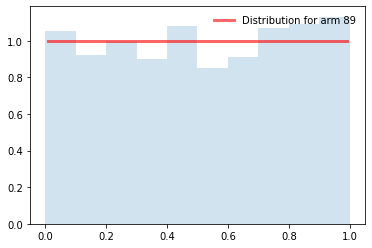

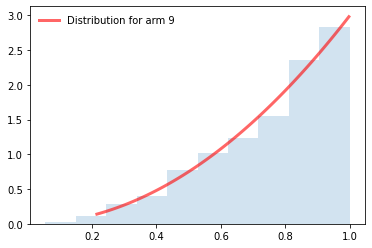

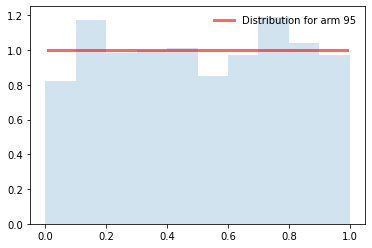

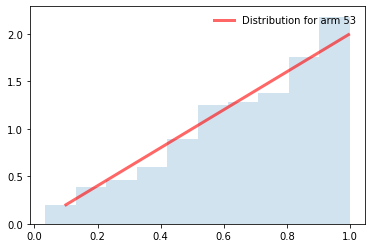

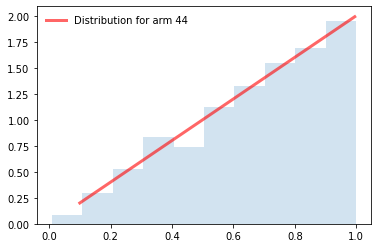

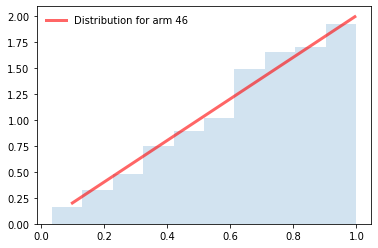

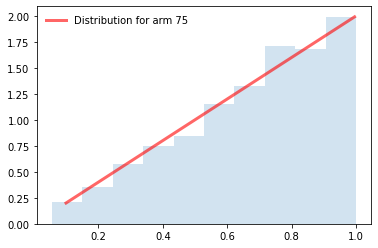

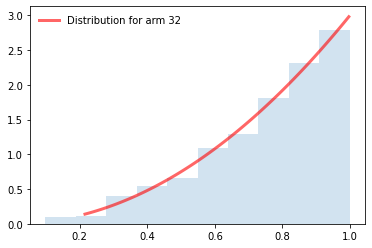

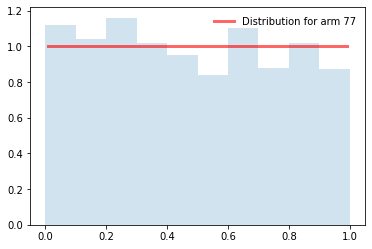

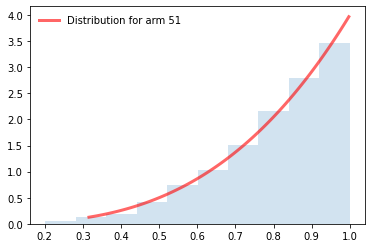

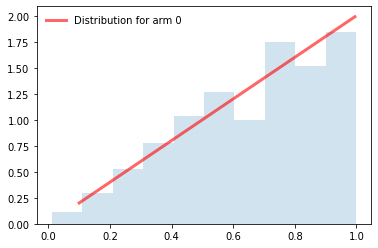

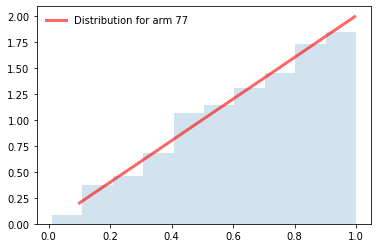

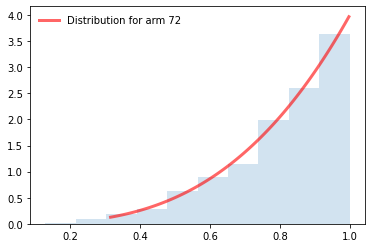

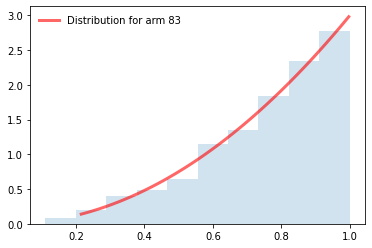

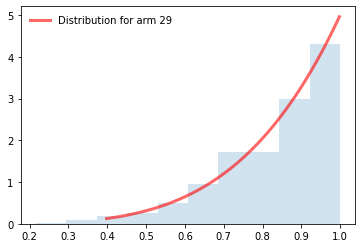

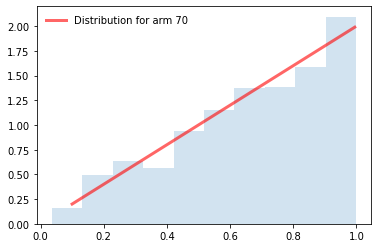

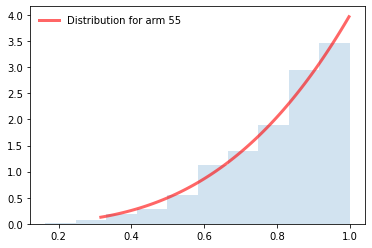

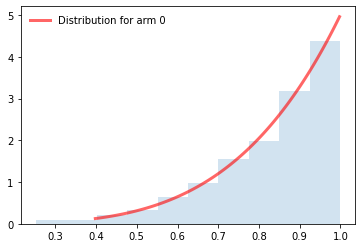

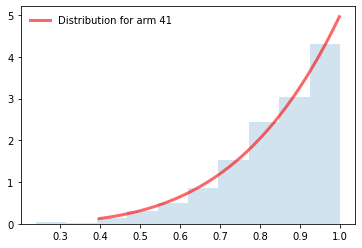

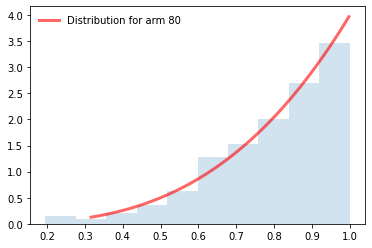

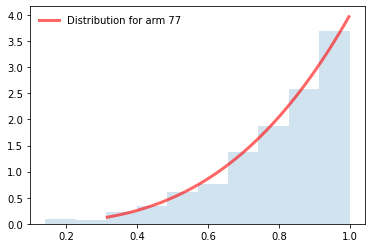

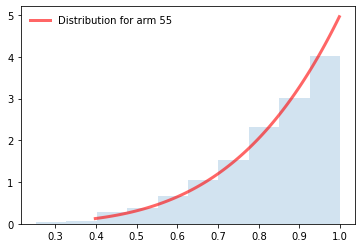

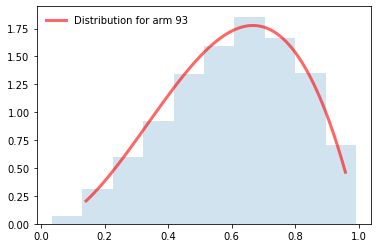

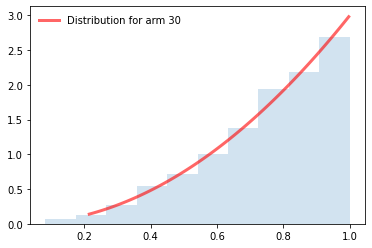

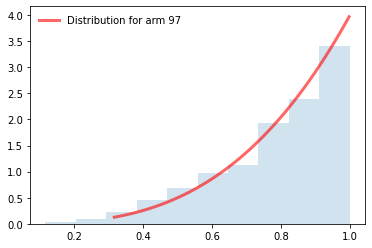

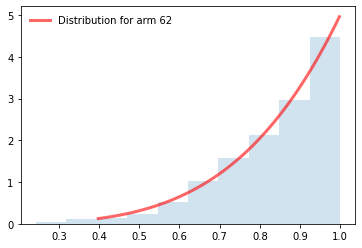

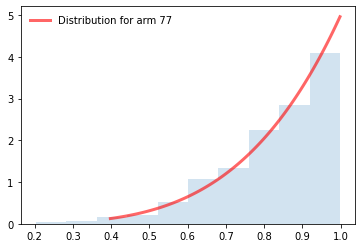

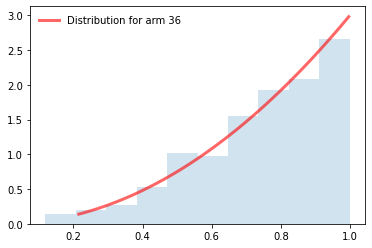

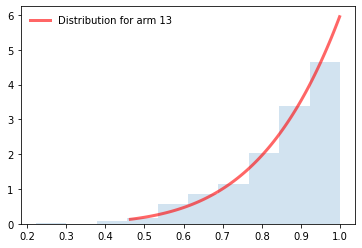

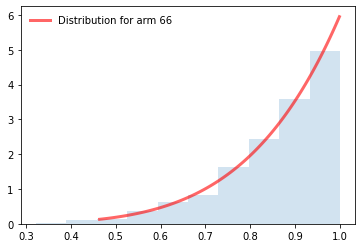

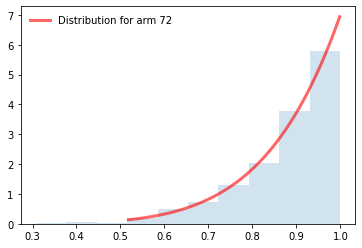

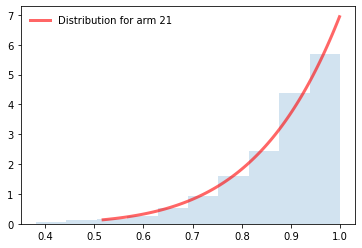

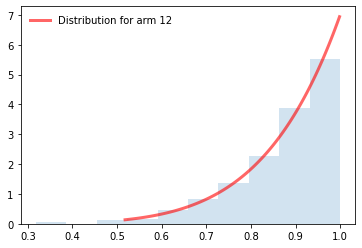

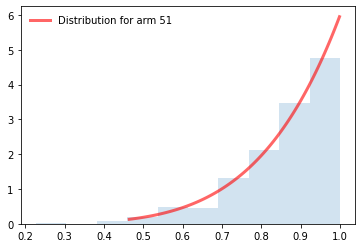

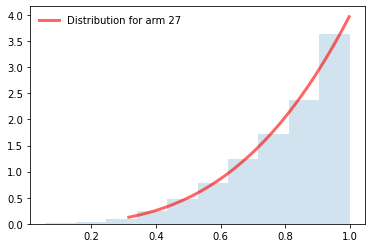

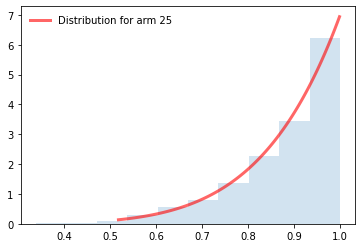

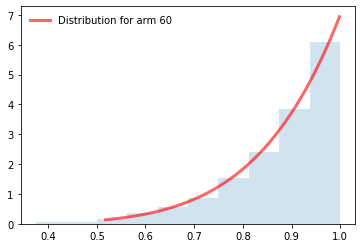

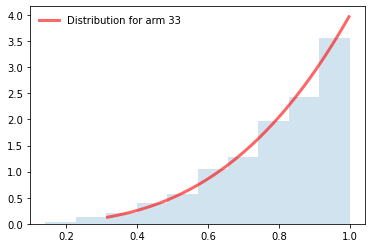

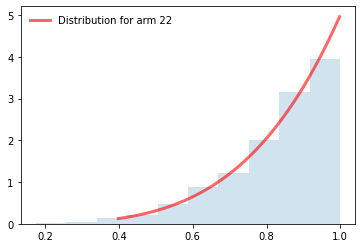

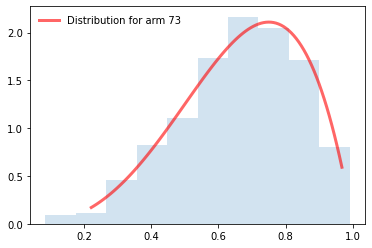

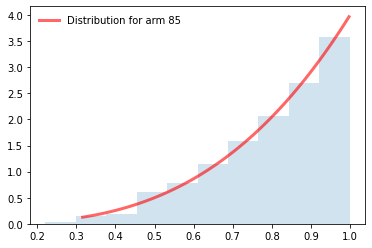

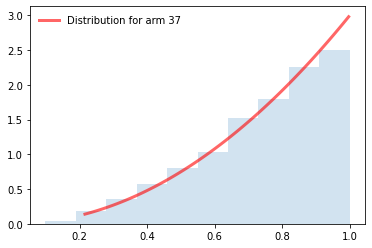

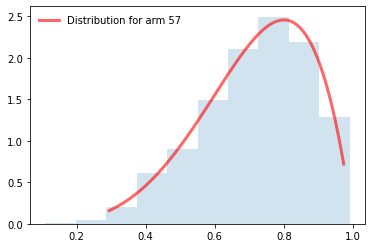

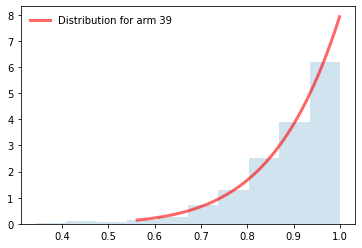

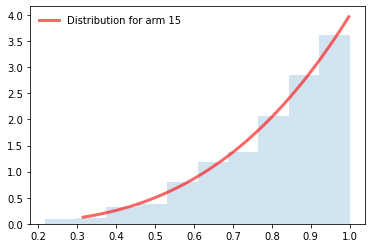

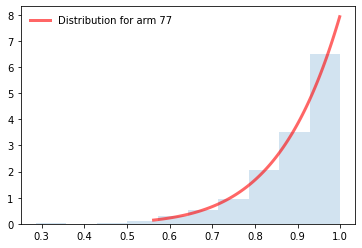

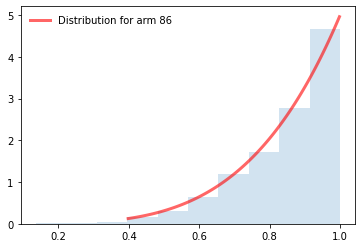

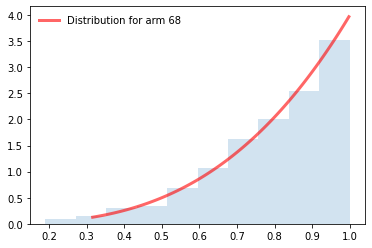

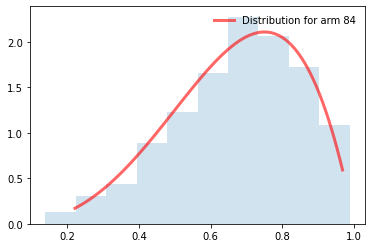

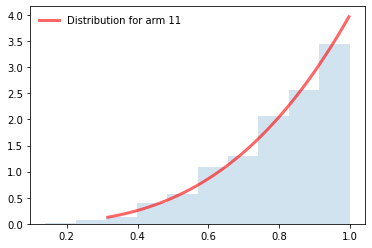

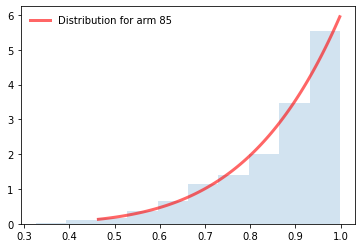

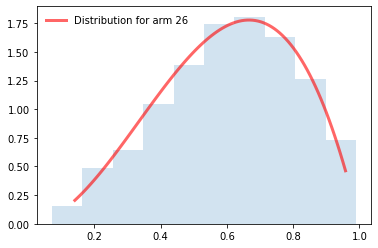

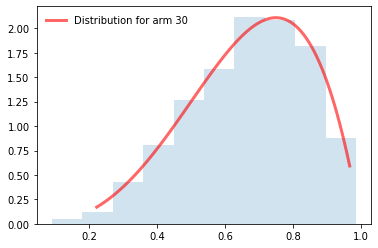

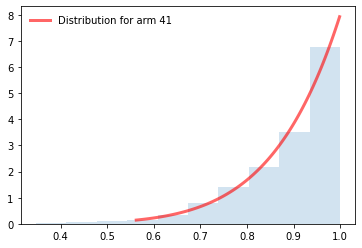

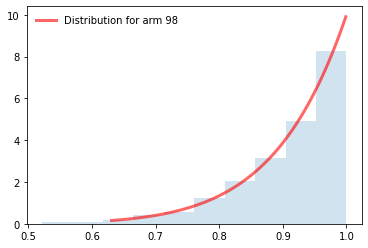

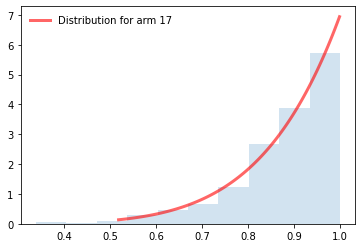

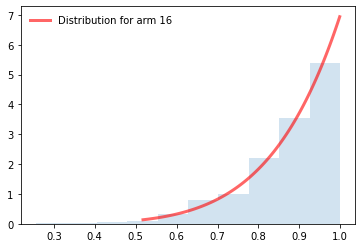

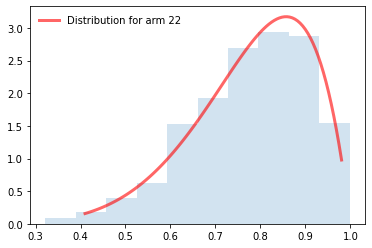

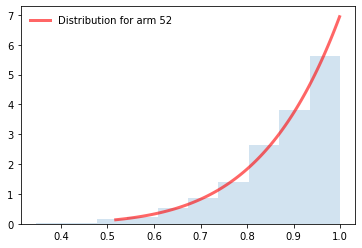

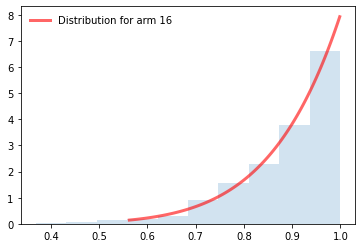

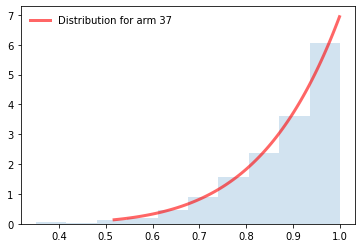

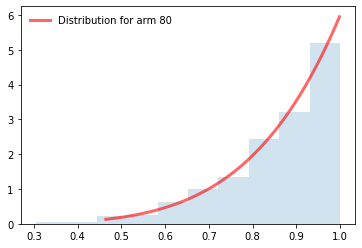

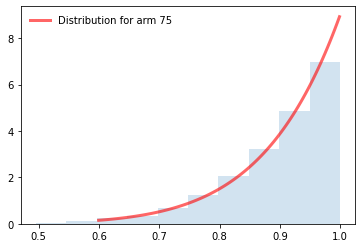

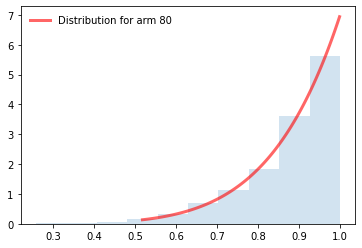

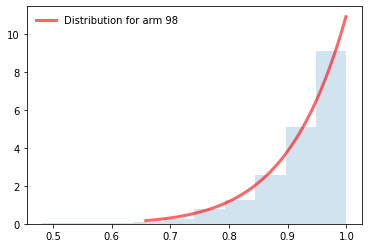

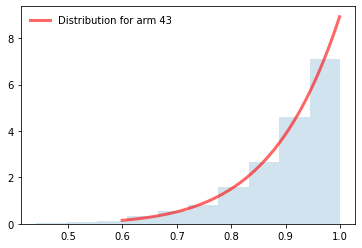

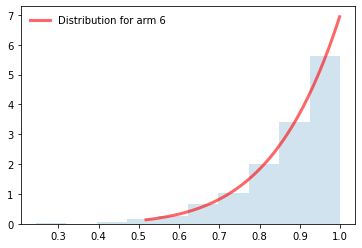

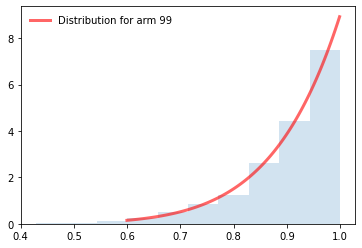

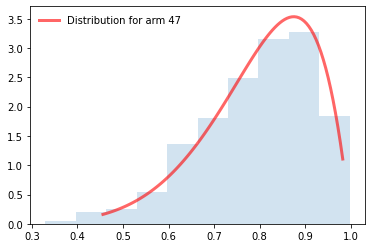

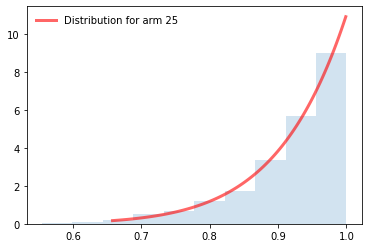

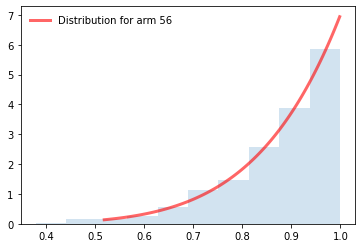

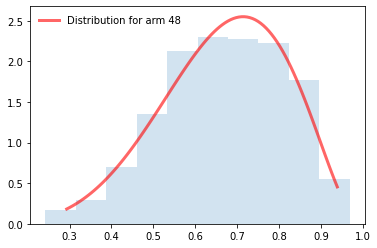

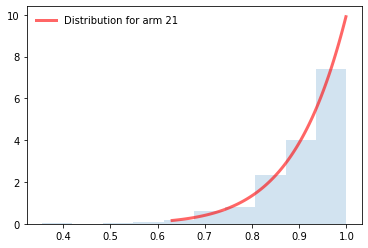

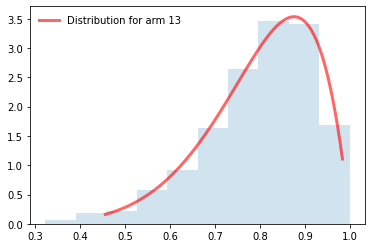

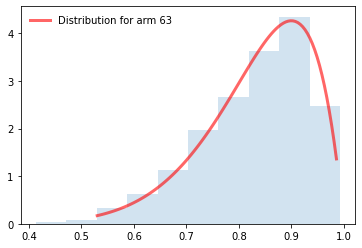

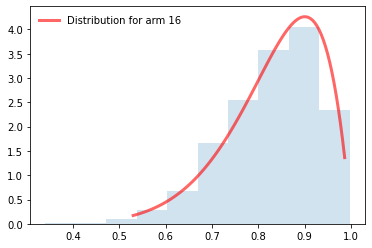

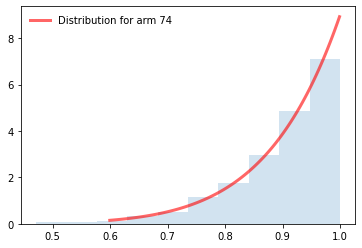

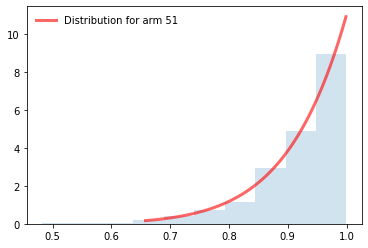

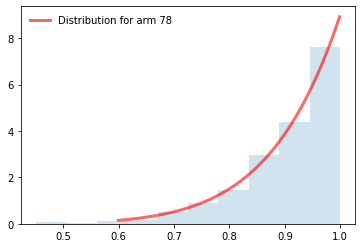

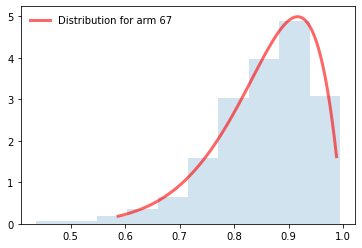

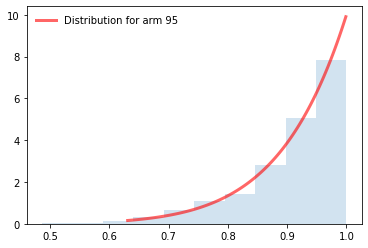

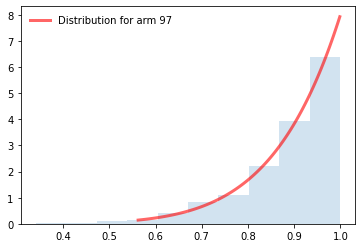

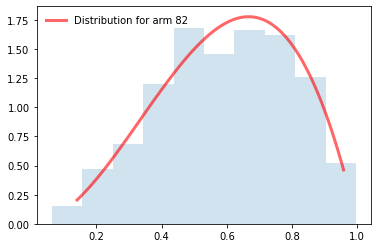

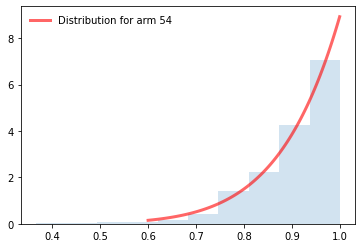

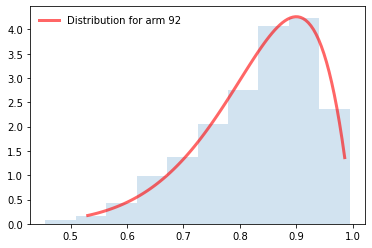

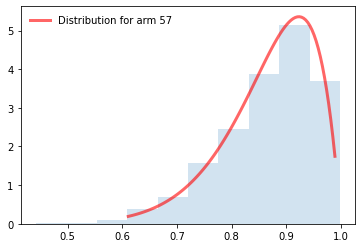

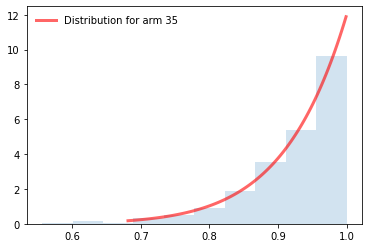

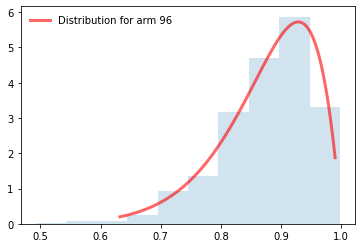

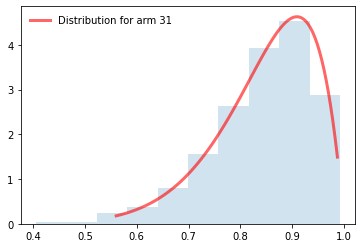

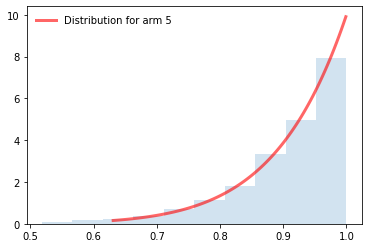

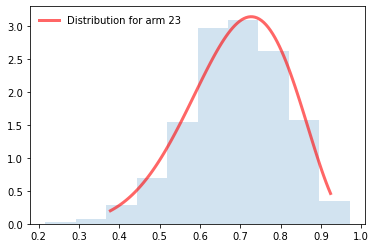

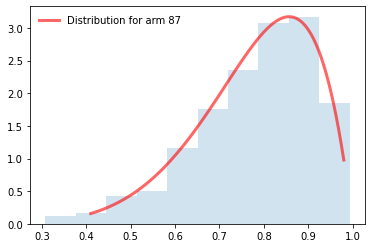

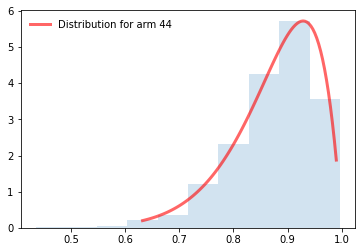

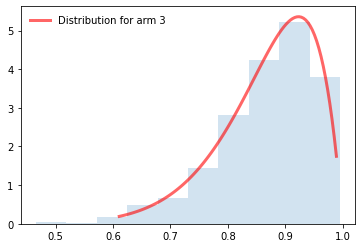

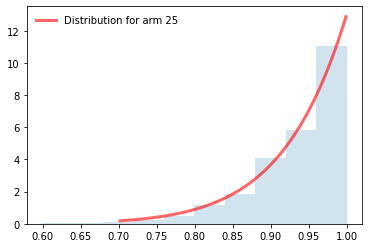

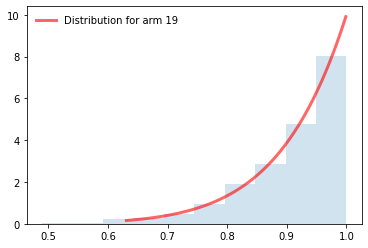

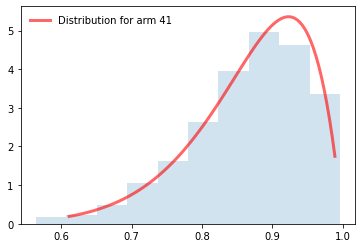

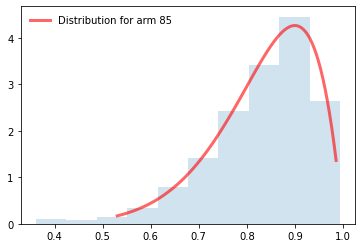

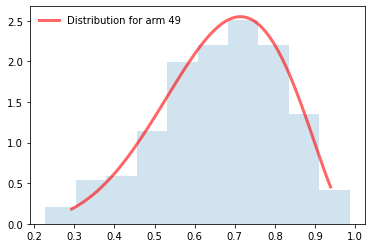

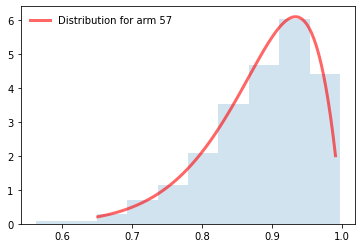

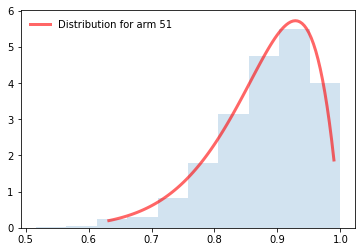

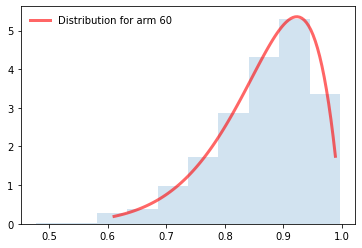

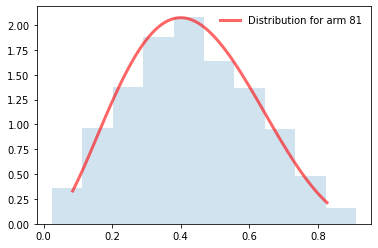

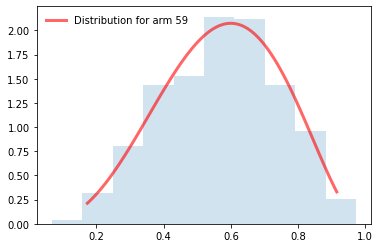

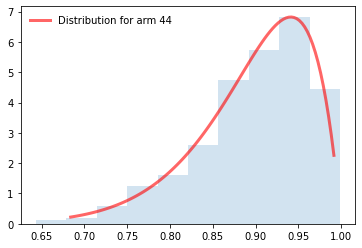

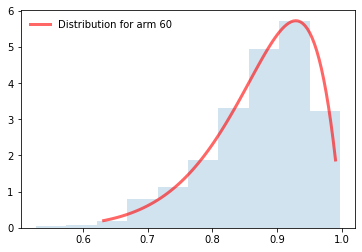

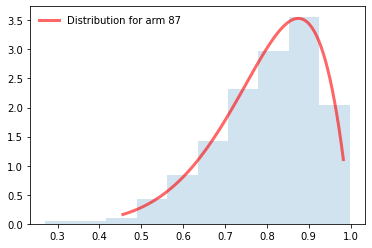

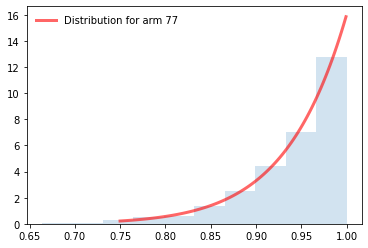

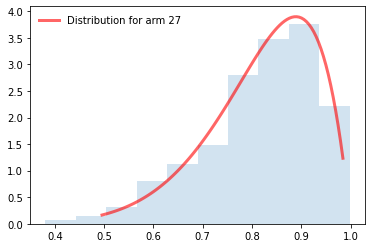

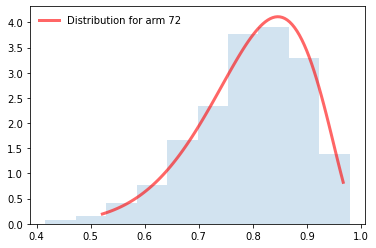

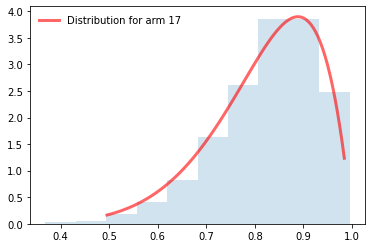

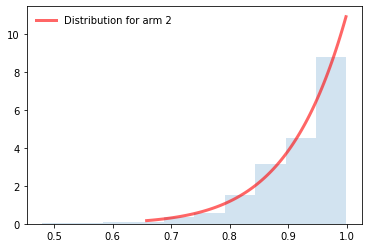

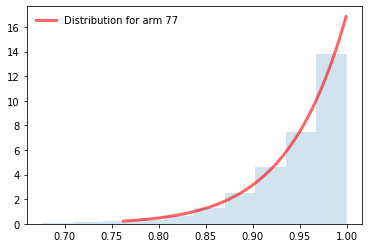

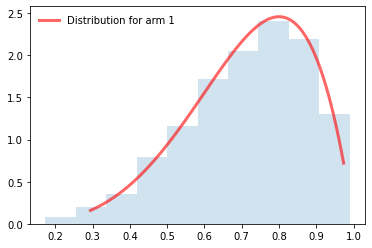

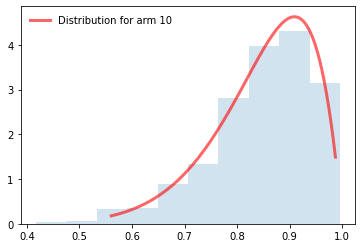

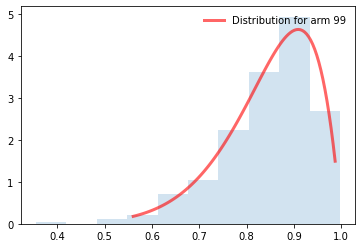

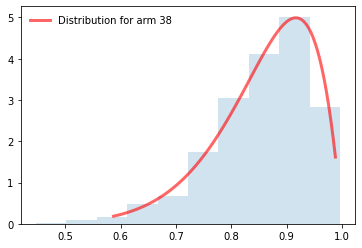

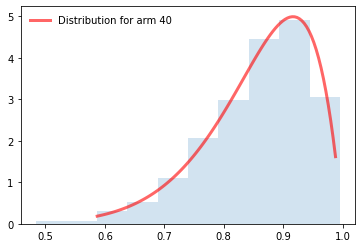

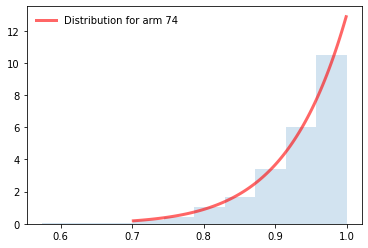

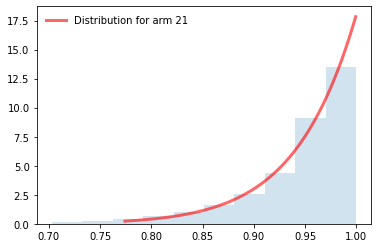

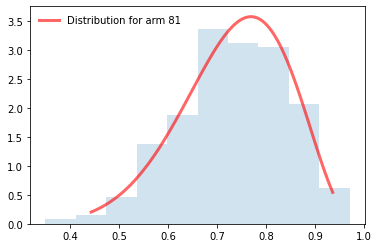

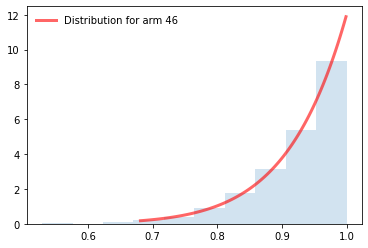

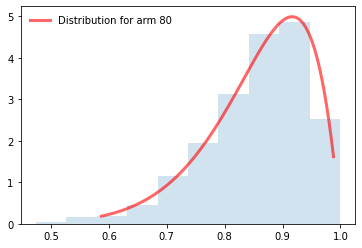

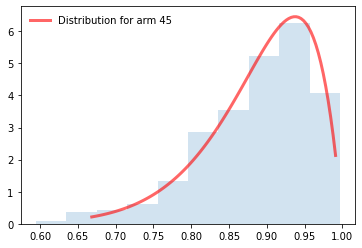

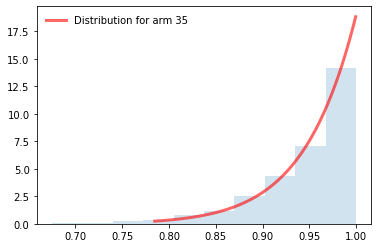

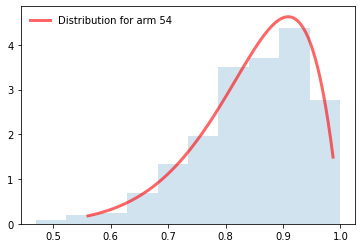

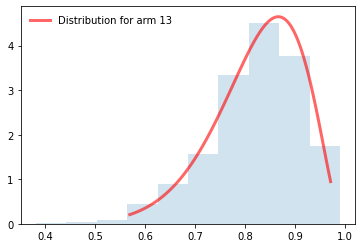

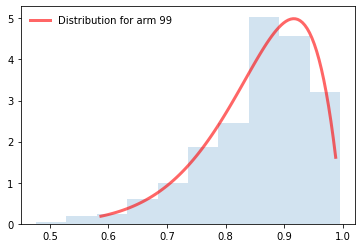

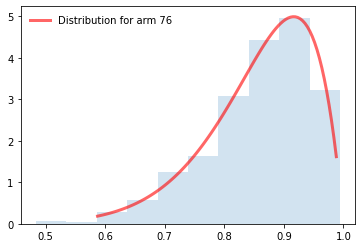

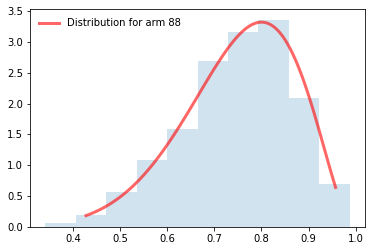

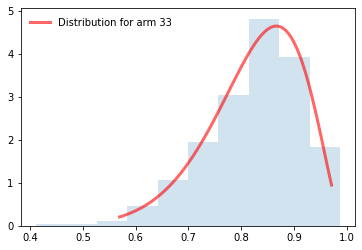

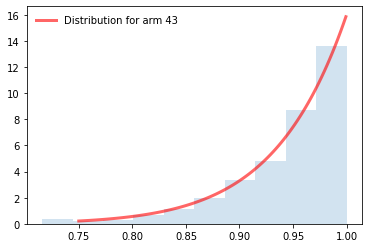

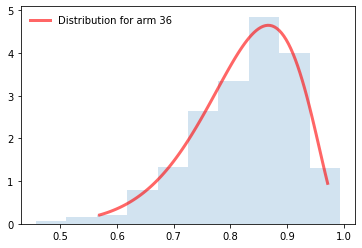

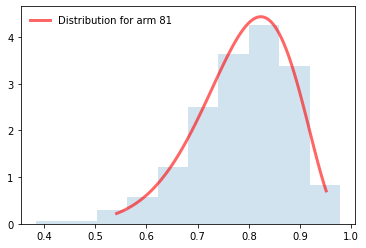

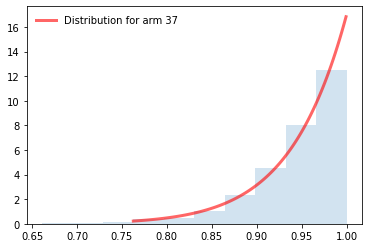

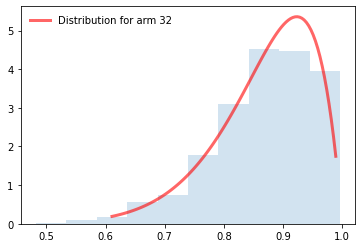

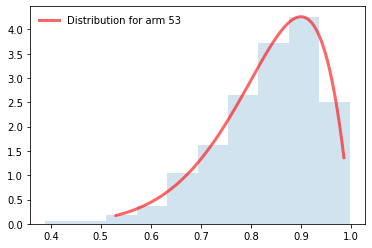

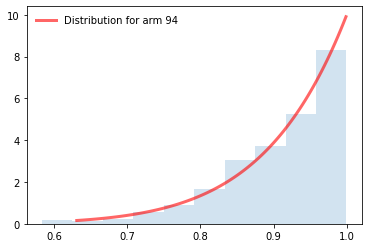

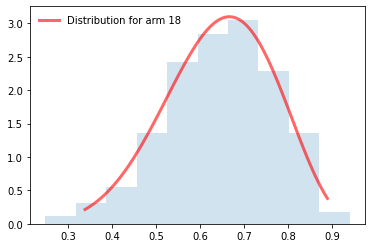

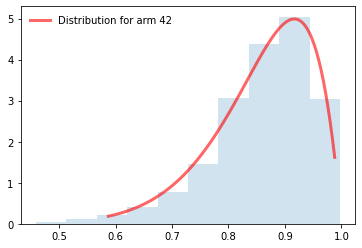

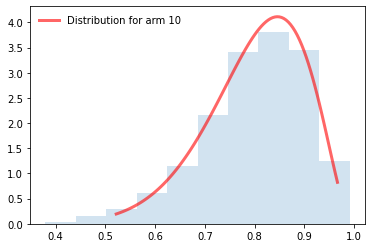

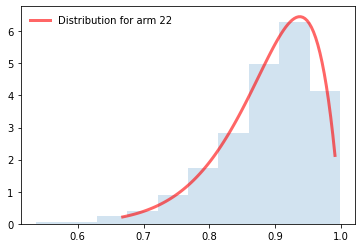

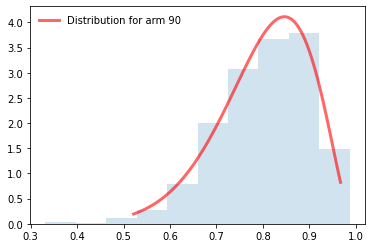

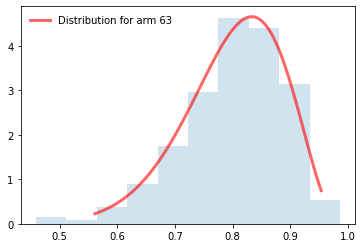

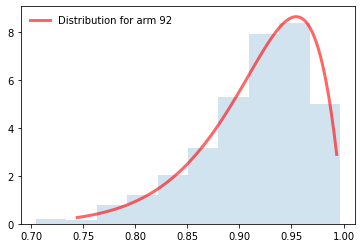

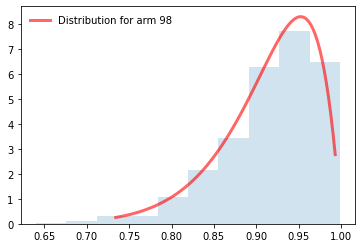

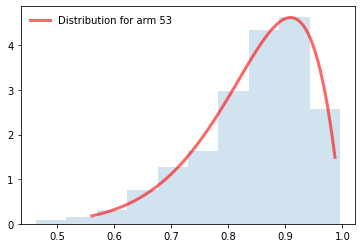

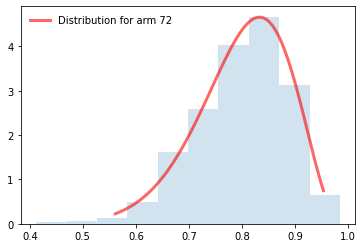

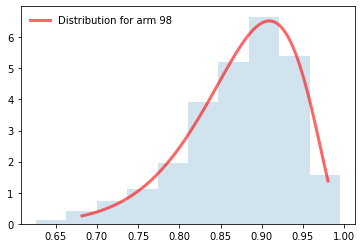

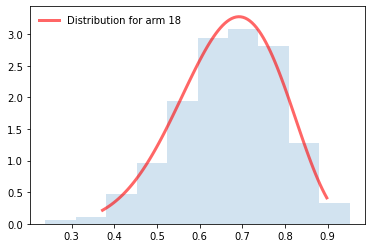

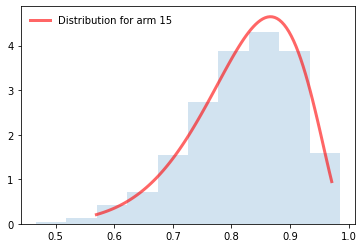

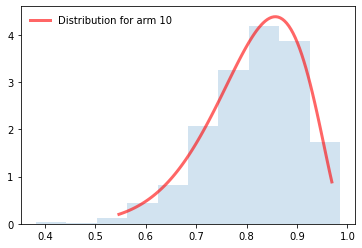

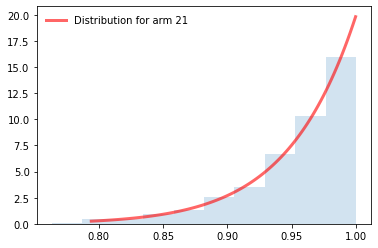

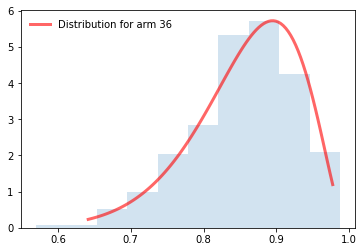

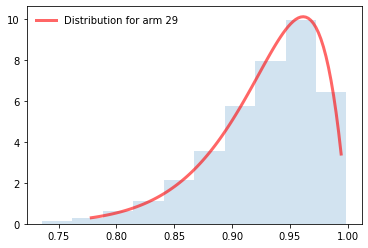

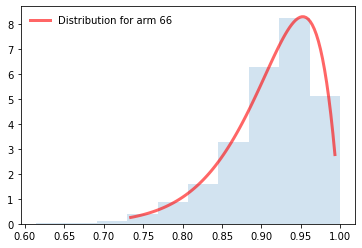

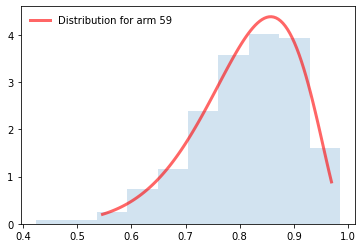

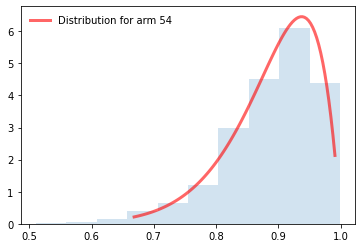

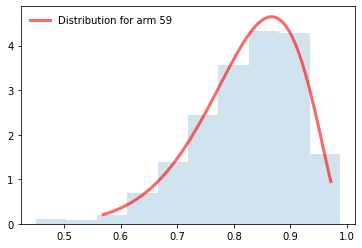

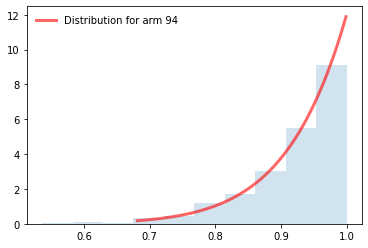

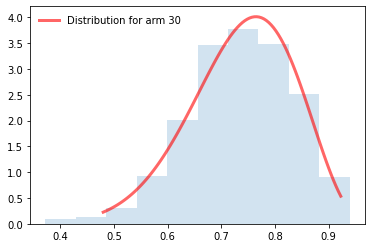

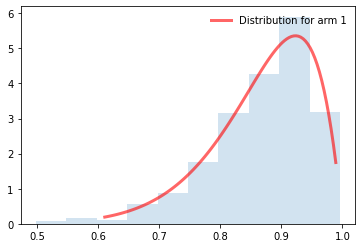

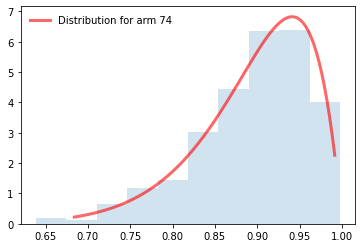

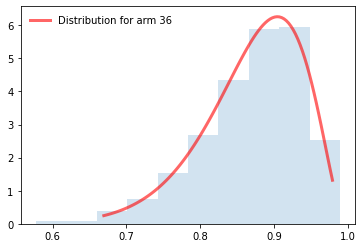

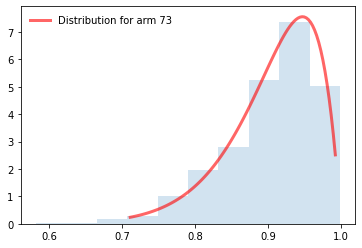

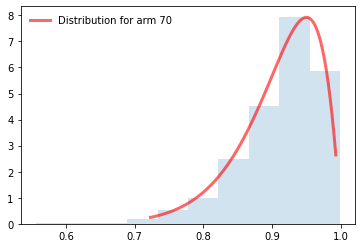

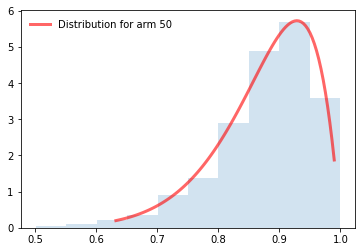

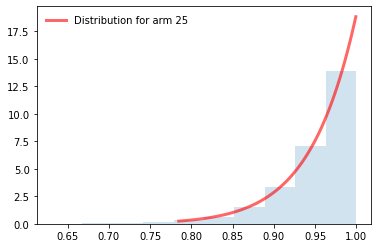

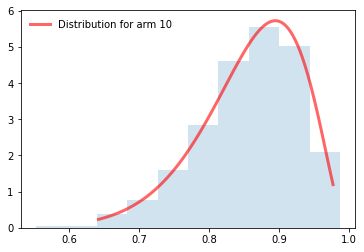

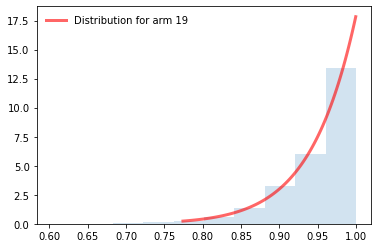

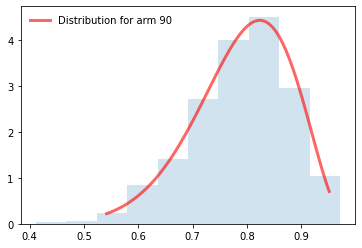

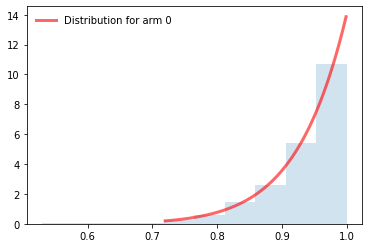

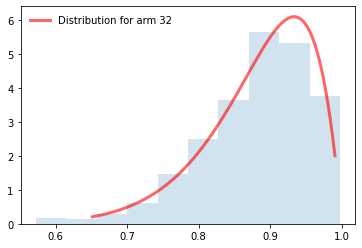

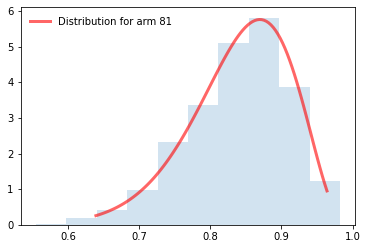

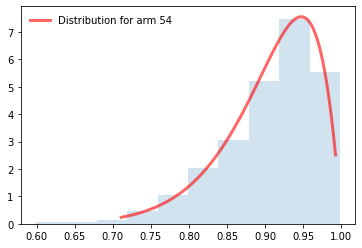

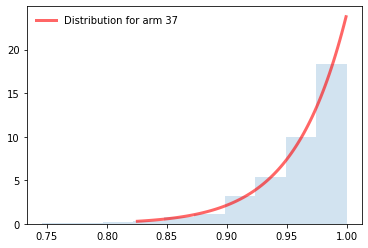

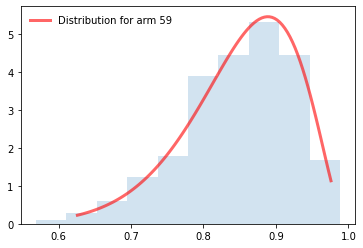

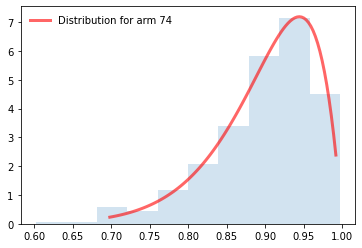

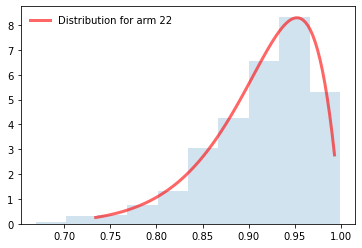

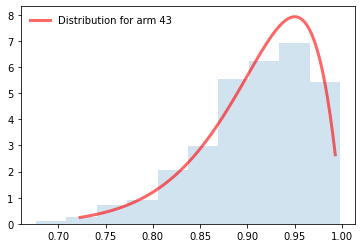

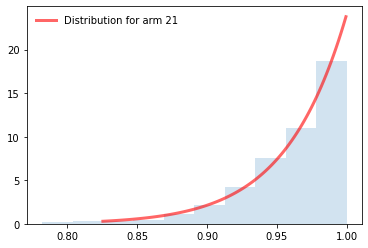

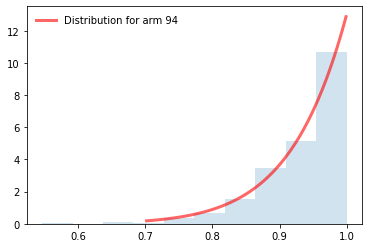

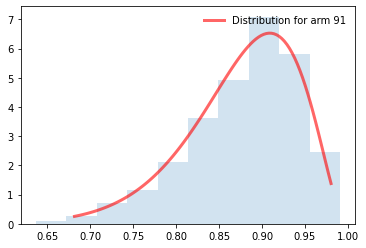

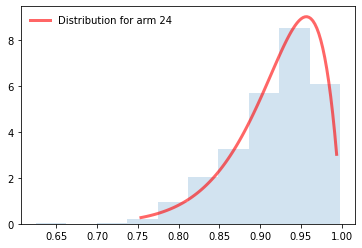

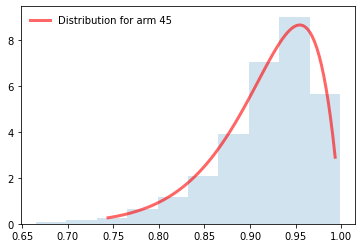

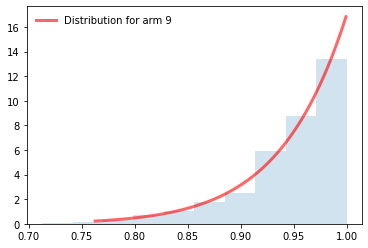

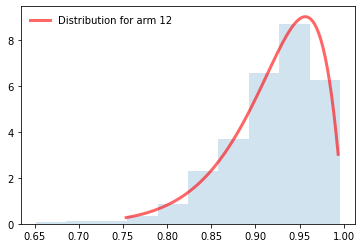

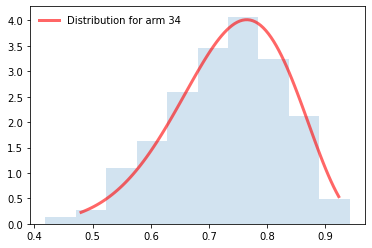

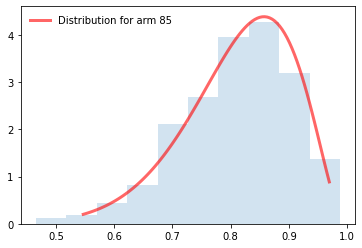

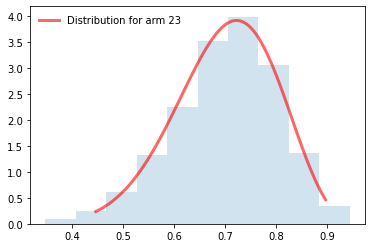

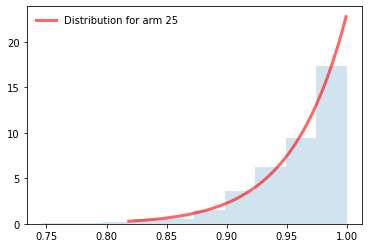

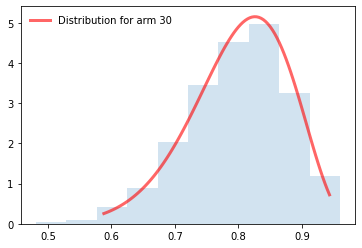

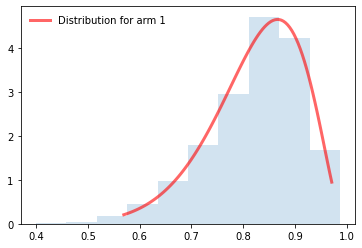

In [89]:
for n in range(configura.episodeSteps):
    arm_selection, p_a, p_b = agent(observa, configura)
    observa.reward += give_rewards()
    observa.step +=1
    observa.lastActions = [arm_selection, random_oponent_selection()]
    #print(observa.lastActions)
    if observa.step %10 == 0:
        #print(observa.step)
#         print(f"Posterior A: {p_a}")
#         print(f"Posterior B: {p_b}")
        plot_arm_dist(arm_selection, p_a, p_b)

In [20]:
p_a/(p_a+p_b)*likelihood_arms

array([0.14633185, 0.13911785, 0.12700641, 0.14845674, 0.14972105,
       0.16971786, 0.15714331, 0.159934  , 0.14972105, 0.16992987,
       0.14633185, 0.12222258, 0.15821057, 0.14342046, 0.15309601,
       0.14993812, 0.12960273, 0.15298182, 0.14142762, 0.14915728,
       0.15248384, 0.149964  , 0.12907717, 0.12594802, 0.16707391,
       0.1269691 , 0.14796937, 0.13587201, 0.13911785, 0.13905752,
       0.16108382, 0.12176388, 0.16868039, 0.14279562, 0.11478614,
       0.14353029, 0.14517049, 0.10290206, 0.15254574, 0.15359815,
       0.11725309, 0.12552978, 0.15350935, 0.12471465, 0.12520606,
       0.1375408 , 0.13070648, 0.14064323, 0.15416661, 0.08384612,
       0.13065344, 0.18111769, 0.14142762, 0.14404804, 0.13659091,
       0.16415432, 0.13968295, 0.13307053, 0.15085758, 0.11833622,
       0.13911785, 0.12461801, 0.15743503, 0.15821057, 0.11435535,
       0.15625131, 0.10143105, 0.12526037, 0.13911785, 0.13038224,
       0.12673384, 0.15103382, 0.15457108, 0.14633185, 0.10654

In [17]:
likelihood_arms

array([0.30485803, 0.27823569, 0.26988862, 0.33402766, 0.34435841,
       0.32400683, 0.31428663, 0.26988862, 0.34435841, 0.26988862,
       0.30485803, 0.31428663, 0.26988862, 0.28684092, 0.33402766,
       0.26988862, 0.32400683, 0.28684092, 0.29571229, 0.28684092,
       0.24632006, 0.23176254, 0.26988862, 0.26988862, 0.26988862,
       0.2539382 , 0.26179196, 0.28684092, 0.27823569, 0.23176254,
       0.27823569, 0.29571229, 0.26988862, 0.26179196, 0.34435841,
       0.2539382 , 0.30485803, 0.37730755, 0.26988862, 0.23893046,
       0.30485803, 0.30485803, 0.27823569, 0.30485803, 0.27823569,
       0.33402766, 0.33402766, 0.33402766, 0.33402766, 0.37730755,
       0.30485803, 0.24632006, 0.29571229, 0.31428663, 0.28684092,
       0.30485803, 0.31428663, 0.29571229, 0.31428663, 0.35500867,
       0.27823569, 0.32400683, 0.26988862, 0.26988862, 0.32400683,
       0.26988862, 0.35500867, 0.33402766, 0.27823569, 0.28684092,
       0.29571229, 0.26179196, 0.2539382 , 0.30485803, 0.42619

In [ ]:
likelihood_arms = np.ones(100)
likelihood_arms

In [ ]:
def update_likelihood(actions):
    for arm in actions:
        likelihood_arms[arm] *= configura.decayRate

In [ ]:
update_likelihood(observa.lastActions)

In [ ]:
likelihood_arms

In [ ]:
samples = np.random.beta(post_a, post_b)
samples

In [ ]:
n_bandits = 100

In [90]:
post_a = np.ones(n_bandits)
post_b = np.ones(n_bandits)

In [91]:
post_a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
post_b

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [93]:
likelihood_arms = np.ones(n_bandits)
likelihood_arms

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [94]:
samples = np.random.beta(post_a, post_b)
samples

array([0.5044511 , 0.84645809, 0.78066239, 0.08023379, 0.2848553 ,
       0.75894782, 0.26449399, 0.27448557, 0.25158784, 0.82880853,
       0.21620528, 0.45049271, 0.57945223, 0.59121378, 0.75600604,
       0.47399684, 0.27952167, 0.68126089, 0.05058233, 0.51919429,
       0.03129381, 0.57988204, 0.69753103, 0.82612469, 0.76469047,
       0.20870123, 0.82418895, 0.94623724, 0.03738373, 0.24414854,
       0.22365054, 0.16281871, 0.85446467, 0.44927772, 0.71994973,
       0.73426199, 0.84663507, 0.12618677, 0.03250065, 0.56872485,
       0.45403661, 0.04574477, 0.52292154, 0.5675999 , 0.69833254,
       0.07710267, 0.49965603, 0.48723758, 0.47994666, 0.26808457,
       0.47759905, 0.80786736, 0.77868363, 0.9928535 , 0.81995787,
       0.10060903, 0.75431626, 0.40381137, 0.93425013, 0.47164068,
       0.73892028, 0.45391718, 0.19489348, 0.07877995, 0.63412757,
       0.92486773, 0.99401072, 0.01730156, 0.02556067, 0.59628367,
       0.4176404 , 0.75765409, 0.90660864, 0.12692316, 0.48526

In [ ]:
samples

## Test New Logic

In [ ]:
post_a = None
post_b = None
likelihood_mine = None
likelihood_opponent = None
avg_likelihood = None
n_bandits = 100

In [ ]:
post_a = np.ones(n_bandits)
post_b = np.ones(n_bandits)
likelihood_mine = np.ones(n_bandits)
likelihood_opponent = np.ones(n_bandits)
avg_likelihood = np.ones(n_bandits)

In [ ]:
observation = bandit_observation()
observation.reward

In [ ]:
r = observation.reward - total_reward
total_reward = observation.reward

# Analysing Beta Dists

In [95]:
from scipy.stats import beta
import matplotlib.pyplot as plt

In [97]:
p_a

array([16., 14., 18., 19., 10., 16., 16., 13., 15., 18., 20., 11., 24.,
       24., 28., 19., 14., 20., 12., 20., 14., 25., 21., 15., 24., 24.,
        8., 21., 22., 31., 21., 23., 18., 21., 15., 24., 23., 24., 19.,
       14., 18., 28., 18., 22., 28., 24., 17., 15., 14., 14., 15., 18.,
       25., 17., 20., 19., 13., 28., 18., 18., 24., 17., 19., 19., 17.,
       23., 25., 22., 11., 15., 24., 14., 20., 23., 22., 15., 12., 26.,
       18., 12., 19., 23., 11., 27., 20., 14., 16., 14., 17., 16., 16.,
       22., 24., 15., 15., 23., 23., 18., 24., 20.])

In [98]:
p_b

array([1., 3., 2., 3., 1., 1., 2., 4., 2., 1., 4., 3., 2., 4., 6., 3., 3.,
       2., 6., 1., 3., 2., 3., 6., 2., 1., 6., 3., 3., 2., 5., 4., 4., 3.,
       5., 1., 4., 2., 4., 3., 3., 2., 3., 2., 4., 2., 2., 3., 6., 3., 2.,
       6., 1., 2., 3., 4., 6., 3., 6., 4., 2., 4., 3., 5., 1., 2., 2., 5.,
       2., 1., 2., 5., 4., 2., 2., 1., 3., 1., 2., 2., 2., 5., 3., 2., 3.,
       3., 2., 3., 5., 4., 4., 3., 4., 4., 1., 2., 3., 3., 4., 3.])

In [30]:
def beta_mean_var(a,b):
    mean, var, _, _ = beta.stats(a, b, moments='mvsk')
    return mean, var

In [121]:
samples = np.random.beta(p_a, p_b)
pred_samples = int(np.argmax(samples))
pred_samples

64

In [118]:
mean_beta, var_bar, _, _ = beta.stats(p_a, p_b, moments='mvsk')
pred_mean = int(np.argmax(mean_beta))
pred_mean

77

In [122]:
mean_list = []
sample_list = []
for n in range(0,1000):
    mean_beta, var_bar, _, _ = beta.stats(p_a, p_b, moments='mvsk')
    pred_mean = int(np.argmax(mean_beta))
    mean_list.append(pred_mean)
    samples = np.random.beta(p_a, p_b)
    pred_samples = int(np.argmax(samples))
    sample_list.append(pred_samples)

In [123]:
from collections import Counter

In [124]:
m_count = Counter(mean_list)
m_count.most_common()

[(77, 1000)]

In [125]:
s_count = Counter(sample_list)
s_count.most_common()

[(77, 91),
 (19, 86),
 (35, 85),
 (52, 76),
 (25, 75),
 (9, 68),
 (5, 64),
 (94, 60),
 (69, 59),
 (0, 58),
 (64, 48),
 (75, 40),
 (4, 36),
 (66, 15),
 (12, 14),
 (29, 12),
 (60, 10),
 (21, 9),
 (24, 8),
 (53, 7),
 (83, 7),
 (70, 7),
 (74, 7),
 (78, 6),
 (43, 6),
 (73, 5),
 (65, 5),
 (2, 4),
 (95, 4),
 (17, 4),
 (46, 3),
 (45, 3),
 (41, 3),
 (68, 2),
 (80, 2),
 (37, 2),
 (8, 2),
 (50, 2),
 (79, 1),
 (39, 1),
 (28, 1),
 (62, 1),
 (6, 1)]

In [87]:
samples = np.random.beta(p_a, p_b)
print(int(np.argmax(samples)))
samples

51


array([0.44314516, 0.55284997, 0.37920618, 0.38291442, 0.49887088,
       0.47317033, 0.29998322, 0.56108403, 0.46466991, 0.65014318,
       0.41691251, 0.40204165, 0.80308206, 0.56332623, 0.44278024,
       0.57205969, 0.69932564, 0.64315859, 0.528477  , 0.42279402,
       0.68910988, 0.63072391, 0.73717892, 0.58101915, 0.37552516,
       0.59154521, 0.57505563, 0.42030029, 0.40709818, 0.60087133,
       0.39735334, 0.44149532, 0.62147197, 0.41957517, 0.12246958,
       0.65148374, 0.60955843, 0.57332176, 0.41892033, 0.54970313,
       0.45372578, 0.30760874, 0.5334096 , 0.48582024, 0.61812262,
       0.60452936, 0.38720287, 0.33057508, 0.50446387, 0.39494967,
       0.34686864, 0.82544995, 0.52964851, 0.55083387, 0.6613109 ,
       0.51425573, 0.49565788, 0.35839836, 0.46999286, 0.22881991,
       0.58383132, 0.42313192, 0.45037304, 0.66133838, 0.34776139,
       0.5725374 , 0.23804226, 0.19803061, 0.49460804, 0.62619988,
       0.27574103, 0.4901887 , 0.36610381, 0.36612545, 0.22585

In [43]:
mean_beta

array([0.48      , 0.5       , 0.47058824, 0.44444444, 0.43478261,
       0.52380952, 0.5       , 0.59259259, 0.43478261, 0.62962963,
       0.48      , 0.38888889, 0.5862069 , 0.5       , 0.45833333,
       0.55555556, 0.4       , 0.53333333, 0.47826087, 0.52      ,
       0.61904762, 0.64705882, 0.47826087, 0.46666667, 0.61904762,
       0.5       , 0.56521739, 0.47368421, 0.5       , 0.6       ,
       0.57894737, 0.41176471, 0.625     , 0.54545455, 0.33333333,
       0.56521739, 0.47619048, 0.27272727, 0.56521739, 0.64285714,
       0.38461538, 0.41176471, 0.55172414, 0.40909091, 0.45      ,
       0.41176471, 0.39130435, 0.42105263, 0.46153846, 0.22222222,
       0.42857143, 0.73529412, 0.47826087, 0.45833333, 0.47619048,
       0.53846154, 0.44444444, 0.45      , 0.48      , 0.33333333,
       0.5       , 0.38461538, 0.58333333, 0.5862069 , 0.35294118,
       0.57894737, 0.28571429, 0.375     , 0.5       , 0.45454545,
       0.42857143, 0.57692308, 0.60869565, 0.48      , 0.25   

In [44]:
samples

array([0.50969367, 0.5901187 , 0.44557534, 0.40529995, 0.52691802,
       0.48141978, 0.42860333, 0.50748055, 0.37223243, 0.64705892,
       0.51680578, 0.35052295, 0.46864976, 0.3627303 , 0.38489537,
       0.65896818, 0.33863594, 0.50004507, 0.50173289, 0.52233129,
       0.63712196, 0.68595357, 0.58028763, 0.45457398, 0.51291036,
       0.48811477, 0.50392154, 0.42934715, 0.33325917, 0.74251984,
       0.38698992, 0.53433002, 0.69744247, 0.66020674, 0.42135412,
       0.5879546 , 0.41307106, 0.25436931, 0.77473557, 0.68097071,
       0.52502371, 0.5502569 , 0.46636582, 0.249373  , 0.34759065,
       0.25919496, 0.39854961, 0.36977952, 0.32903362, 0.12090931,
       0.41303613, 0.8097901 , 0.56316632, 0.54130136, 0.50953632,
       0.61695543, 0.29852844, 0.62445765, 0.54371953, 0.39360712,
       0.62844885, 0.39853091, 0.51812725, 0.63740368, 0.27300132,
       0.57899733, 0.21899212, 0.37828985, 0.35447008, 0.36239316,
       0.41104832, 0.61590718, 0.53572118, 0.5203048 , 0.35593